In [1]:
%matplotlib inline
import loom
import logging
loom.set_logging(
    logger_name='loom',
    logging_level=logging.INFO,
    logging_stream=None,
    logging_file_name='/home/chan/loom/logs/get_soliton_tree.log'
)
from IPython.display import Image
import matplotlib

Use TkAgg backend for matplotlib.


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
d = loom.api.SpectralNetworkData(data_dir='/home/chan/loom/data/default')

INFO:loom:Opening data directory "/home/chan/loom/data/default"...
INFO:loom:Seiberg-Witten curve in the 1st fundamental representation:
(note: \lambda = x dz)
v_{2} x + v_{3} + x^{3} + z^{2} = 0
(numerically
x^{3} + 1.0 x + z^{2} \left(-0.5 + 0.86602540378443864676 i\right) + 1.0=0
)
INFO:loom:Seiberg-Witten differential:
x dz
(numerically
x \left(0.5 + 0.86602540378443864676 i\right) dz
)
INFO:loom:ramification point #0: z = (-0.975922662037-0.345096666087j), x = -0.57735026919j, i = 2.
INFO:loom:ramification point #1: z = (0.975922662037+0.345096666087j), x = -0.57735026919j, i = 2.
INFO:loom:ramification point #2: z = (0.786823810611+0.67262548441j), x = 0.57735026919j, i = 2.
INFO:loom:ramification point #3: z = (-0.786823810611-0.67262548441j), x = 0.57735026919j, i = 2.
INFO:loom:irregular puncture #0 at z=oo
INFO:loom:Loading /home/chan/loom/data/default/data_1.json...
INFO:loom:Loading /home/chan/loom/data/default/data_0.json...
INFO:loom:Loading /home/chan/loom/data/default/d

In [3]:
d.reset_z_rotation()

In [4]:
plot_range = [[-2, 2], [-2, 2]]

In [5]:
from loom.plot_api import SpectralNetworkPlot
p = SpectralNetworkPlot(matplotlib_figure=matplotlib.figure.Figure(), plot_range=plot_range)
p.draw(sw_data=d.sw_data, spectral_network=d.spectral_networks[0])

/usr/local/lib/python2.7/dist-packages/matplotlib/tight_layout.py:222: UserWarning: tight_layout : falling back to Agg renderer
  warnings.warn("tight_layout : falling back to Agg renderer")


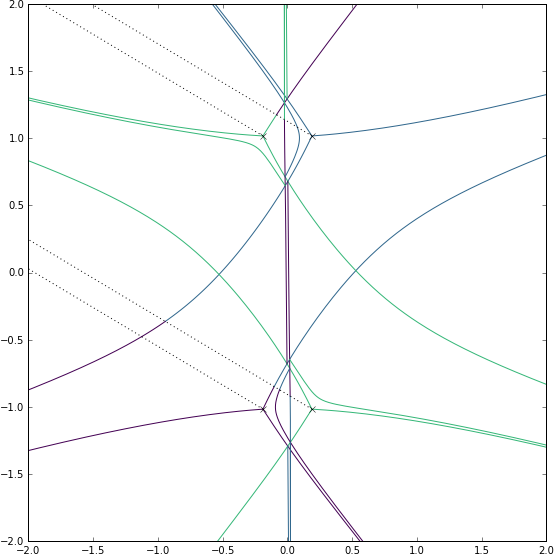

In [6]:
p.figure

In [ ]:
#from bokeh.plotting import show
#from bokeh.io import output_notebook

#from loom.bokeh_plot import get_spectral_network_bokeh_plot

#output_notebook()

In [ ]:
#f = get_spectral_network_bokeh_plot(d, plot_range=plot_range, notebook=True)

#show(f)

Get soliton trees (one lane of two-way streets)

In [7]:
soliton_tree_data = d.find_two_way_streets()

Soliton trees in spectral network #0

In [8]:
soliton_tree_data[0]

[<loom.spectral_network.SolitonTree instance at 0x7f7573c90440>,
 <loom.spectral_network.SolitonTree instance at 0x7f7573c90170>,
 <loom.spectral_network.SolitonTree instance at 0x7f7573c907e8>,
 <loom.spectral_network.SolitonTree instance at 0x7f7573a6a2d8>]

Get a soliton tree of spectral network #0

In [9]:
tree_0_0 = soliton_tree_data[0][0]

The phase (\theta) of the soliton tree

In [10]:
tree_0_0.phase

0.01

The central charge of the soliton tree, which is a half of the central charge of the corresponding two-way street.

In [11]:
tree_0_0.Z

(9.0907041472747423+0.090910071828677469j)

Show the structure of a soliton tree, where each node is either a part of an S-wall (loom.spectral_network.Street) or a branch point. 

In [12]:
tree_0_0.draw_graph(file_name='./soliton_tree_0_0.png')

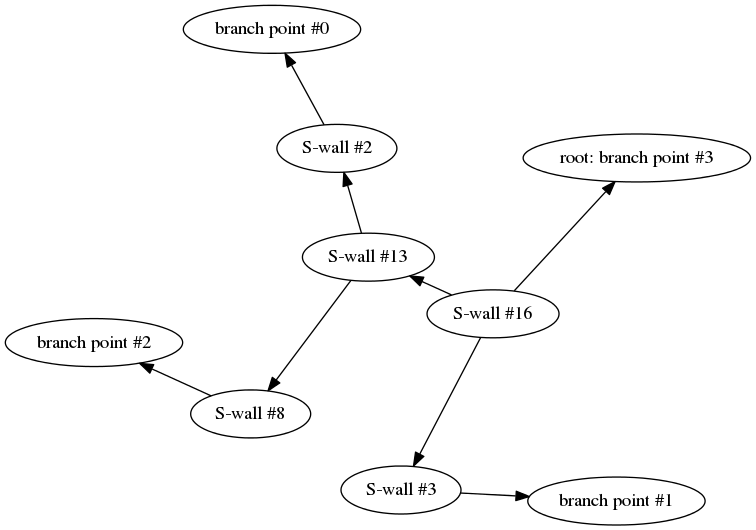

In [13]:
Image(filename='./soliton_tree_0_0.png', width=600) 

The streets are stored at SolitonTree.streets.

In [14]:
tree_0_0.streets

Draw the soliton tree.

In [15]:
from loom.plot_api import SolitonTreePlot
tree_0_0_plot = SolitonTreePlot(plot_range=plot_range)

tree_0_0_plot.draw(title='tree_0_0', sw_data = d.sw_data, soliton_tree=tree_0_0)
with open('./soliton_tree_0_0_plot.png', 'w') as fp:
    tree_0_0_plot.figure.savefig(fp, format='png', dpi=300)

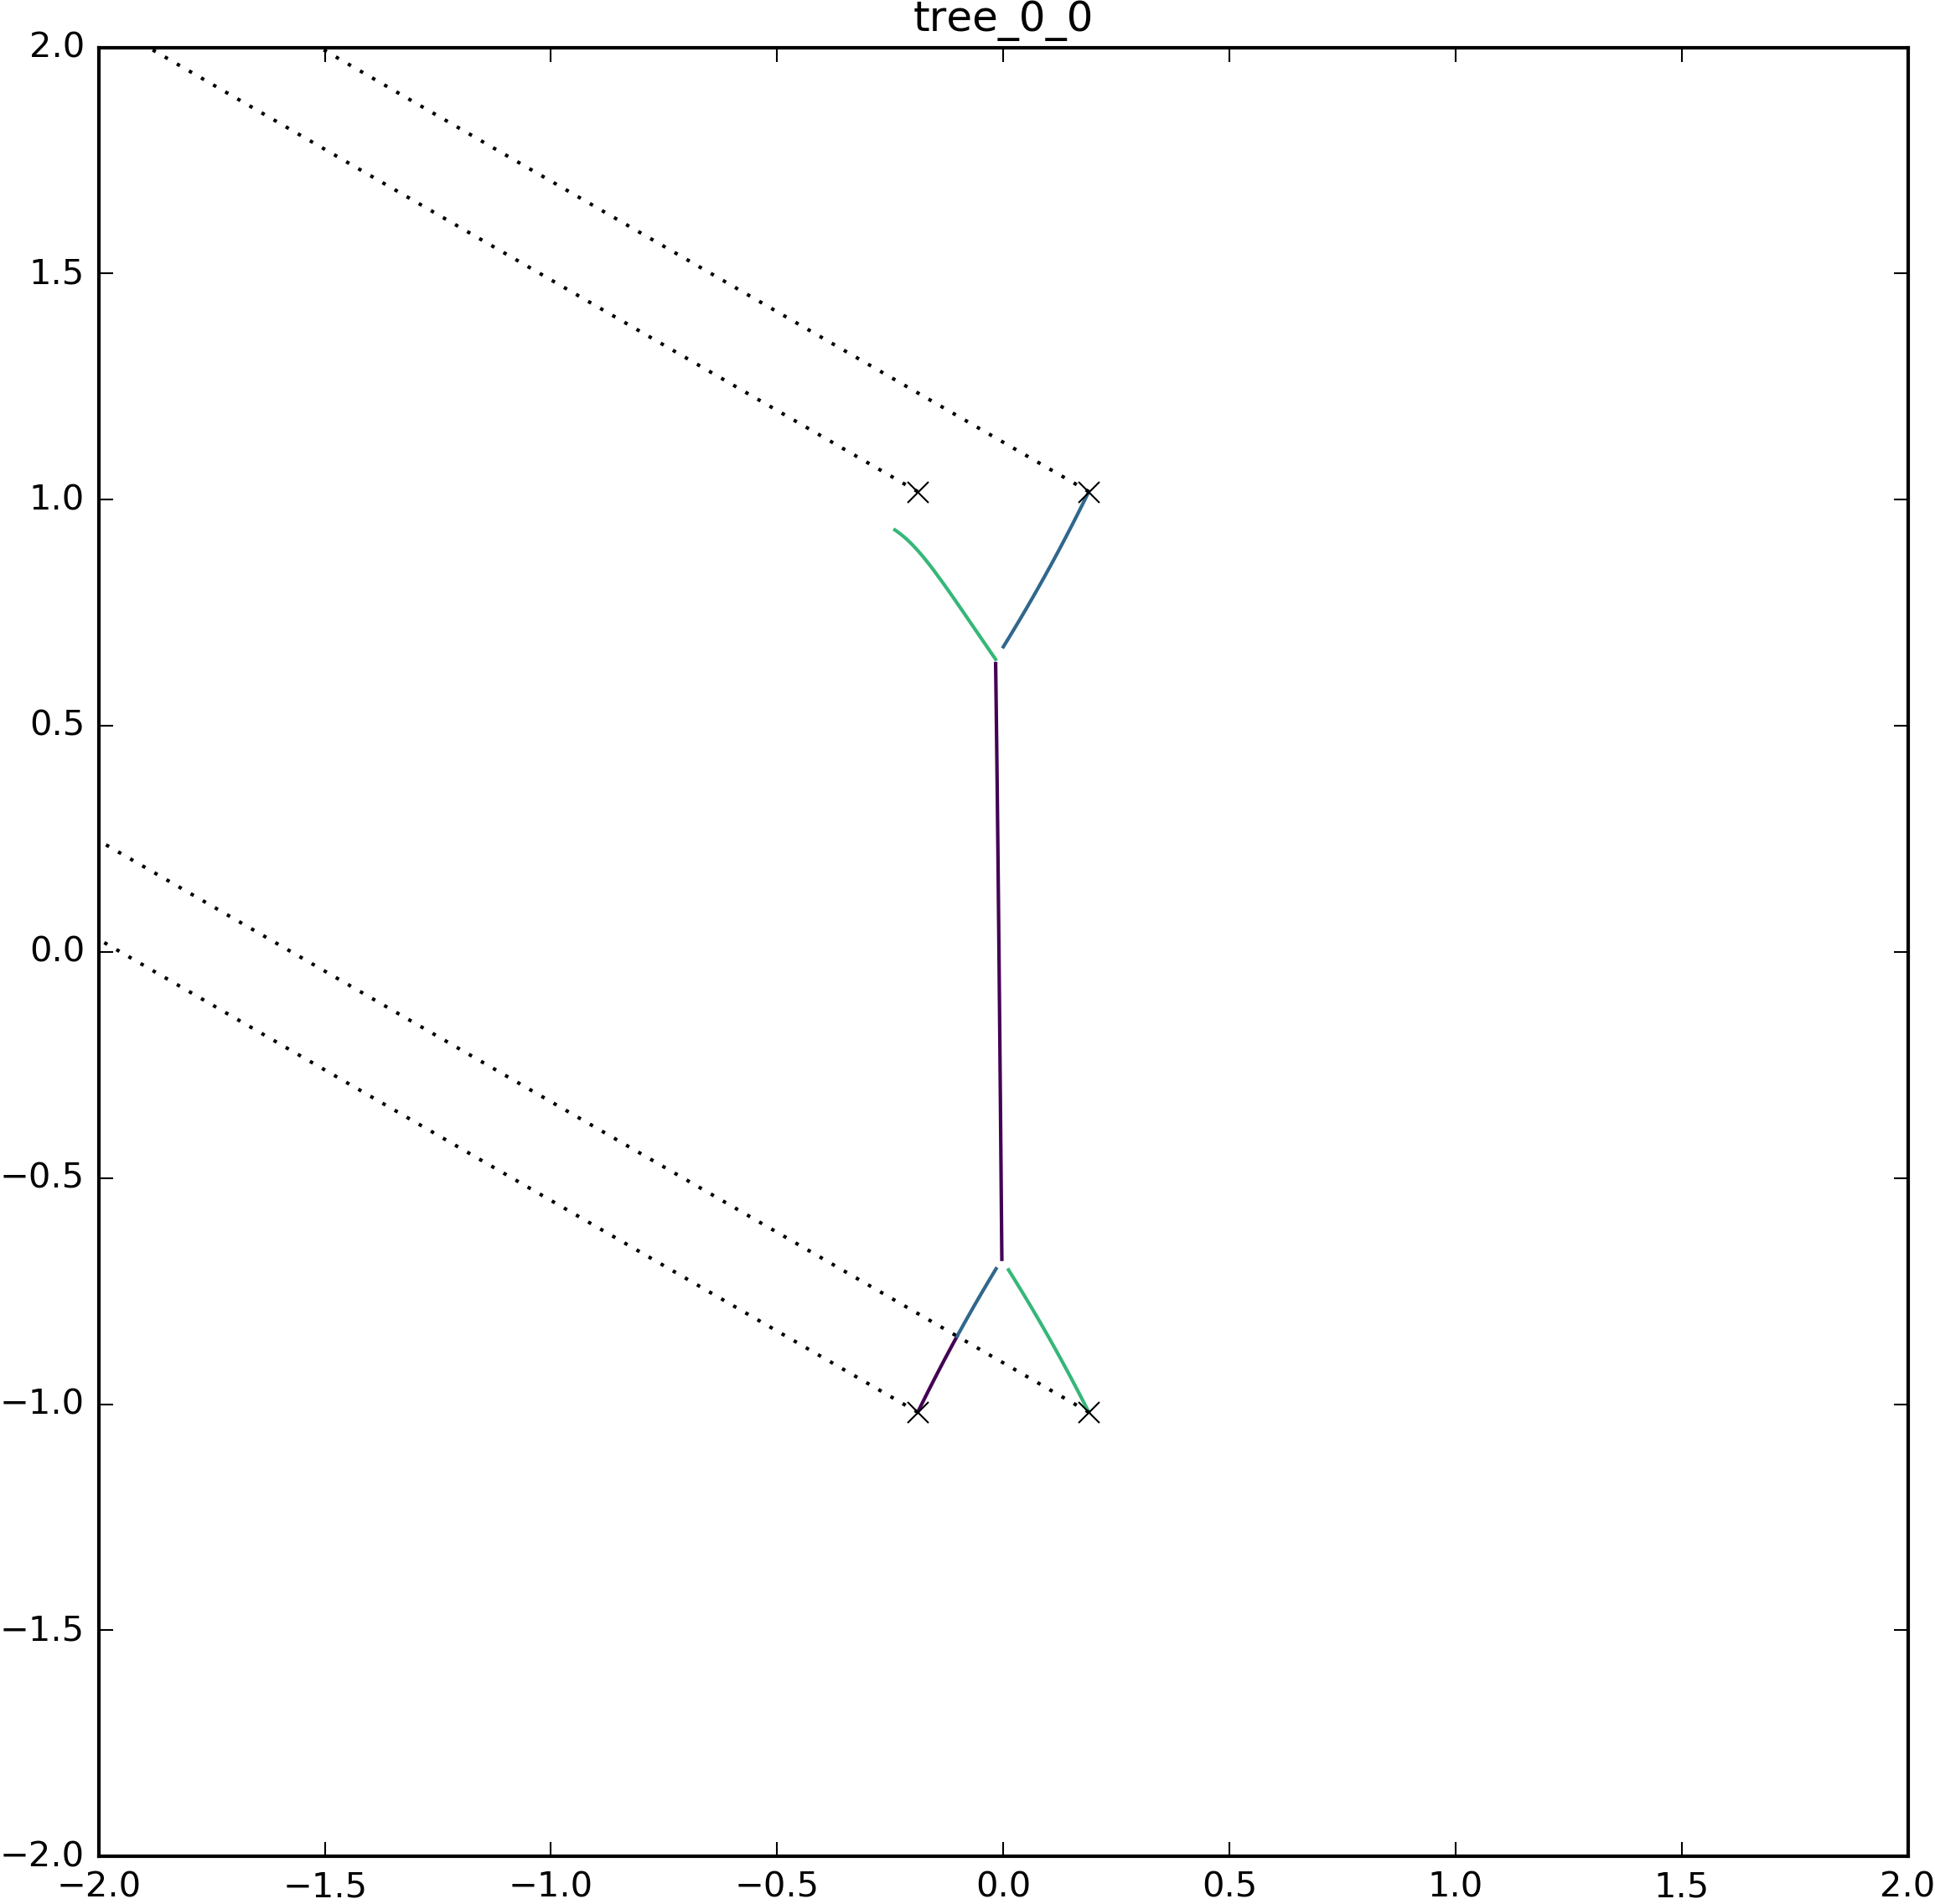

In [16]:
Image(filename='./soliton_tree_0_0_plot.png', width=600) 